# Logistic Regression

In [1]:
# Import libraries needed
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


## Data setup

In [2]:
# Read dataset and transform "Room_Occupancy_Count" into a binary colum
df = pd.read_csv('../Occupancy_Estimation.csv')
df["Room_Occupancy_Count"] = [1 if value else 0 for value in df["Room_Occupancy_Count"]]

# Create training an testing datasets
feature_data = df.drop(columns=["Room_Occupancy_Count", "Date", "Time"])
X_train, X_test, Y_train, Y_test = train_test_split(feature_data, df["Room_Occupancy_Count"], test_size=0.2)


## Model Creation

In [3]:
# Create a Logistic Regression Classifier and print coeficients
LogReg = LogisticRegression(random_state=0, solver='liblinear').fit(X_train, Y_train)
LogReg.coef_

array([[-0.62901858,  0.75691701,  3.16630082, -3.36472627,  0.18566854,
        -0.02704136,  0.12673461, -0.19160347,  0.1912221 ,  1.58511348,
        -0.04238112, -0.2532515 , -0.00738396,  2.73672516,  1.87752555,
         3.67023885]])

## Model Evaluation

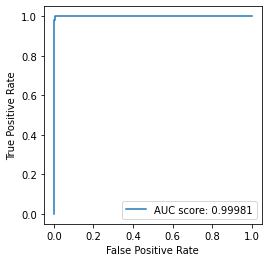

In [4]:
# Calculate scores for testing dataset
scores = LogReg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, scores[:,1])

# Calculate AUC score
auc = roc_auc_score(Y_test, scores[:,1])

# Print ROC plot
plt.plot(fpr, tpr,)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(["AUC score: " + str(round(auc, 5))], loc="best")
plt.show()

## Results

As we can see, utilizing the Logistic Regression classifier we can achieve an accuracy of up to 0.9999 for a binary configuration. Further work may chain up multiple Logistic Regression models to obtain a multi-class prediction for a given datapoint.